In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sample from function we want to approximate
sigma_n = 0.1   # standard deviation noise
n_train = 20    # number of training points

x_train = (np.random.rand(n_train, 1)-0.5)*2                # sample input data
x_train = x_train.reshape(n_train,1)                        # reshape   
y_train = x_train**3 + sigma_n*np.random.randn(n_train, 1)  # sample from function

In [3]:
# initialize gradient descent algorithm

lr = 0.2 # learning rate
epoch_max = 10**5 # learning steps

# initialization first layer, 
# notation: wi_j is weight of neuron j in layer i
w1_1 = np.random.rand(1,1)
b1_1 = np.random.rand(1,1)
w1_2 = np.random.rand(1,1)
b1_2 = np.random.rand(1,1)

# initialization second layer
w2_1 = np.random.rand(1,1)
b2_1 = np.random.rand(1,1)
w2_2 = np.random.rand(1,1)

# write to list
weights = {
    "w1_1": w1_1,
    "b1_1": b1_1,
    "w1_2": w1_2,
    "b1_2": b1_2,
    "w2_1": w2_1,
    "b2_1": b2_1,
    "w2_2": w2_2,
}

In [4]:
# function to evaluate the network
def eval_network(x, weights):

    n_train = np.shape(x)[0]
    
    y_pred = np.zeros((n_train, 1))
    
    z1_1 = np.zeros((n_train, 1))
    z1_2 = np.zeros((n_train, 1))
    a1_1 = np.zeros((n_train, 1))
    a1_2 = np.zeros((n_train, 1))

    z2_1 = np.zeros((n_train, 1))
    a2_1 = np.zeros((n_train, 1))

    for i in range(0, n_train):
        # layer 1
        z1_1[i,:] = weights["w1_1"]*x[i,:] + weights["b1_1"]
        z1_2[i,:] = weights["w1_2"]*x[i,:] + weights["b1_2"]
        a1_1[i,:] = np.tanh(z1_1[i,:])
        a1_2[i,:] = np.tanh(z1_2[i,:])

        # layer 2
        z2_1[i,:] = weights["w2_1"]*a1_1[i,:]+weights["w2_2"]*a1_2[i,:]+weights["b2_1"]
        a2_1[i,:] = z2_1[i,:]
        y_pred[i,:] = a2_1[i,:]

    activations = {
        "z1_1": z1_1,
        "z1_2": z1_2,
        "z2_1": z2_1,
        "a1_1": a1_1,
        "a1_2": a1_2,
        "a2_1": a2_1,
    }

    return y_pred, activations

# function to evaluate the cost
def cost(y_pred, y_train):

    J = np.linalg.norm(y_pred-y_train, 2)**2
    
    return J

# function to compute gradients
def compute_grads(x_train, y_train, y_pred, weights, activations):

    n_train = np.shape(x_train)[0]
    dy_pred = np.zeros((n_train, 1))
    dz1_1 = np.zeros((n_train, 1))
    dz1_2 = np.zeros((n_train, 1))
    da1_1 = np.zeros((n_train, 1))
    da1_2 = np.zeros((n_train, 1))

    dz2_1 = np.zeros((n_train, 1))
    da2_1 = np.zeros((n_train, 1))

    dw2_1 = np.zeros((n_train, 1))
    dw2_2 = np.zeros((n_train, 1))
    db2_1 = np.zeros((n_train, 1))

    dw1_1 = np.zeros((n_train, 1))
    dw1_2 = np.zeros((n_train, 1))
    db1_1 = np.zeros((n_train, 1))
    db1_2 = np.zeros((n_train, 1))

    for i in range(0,n_train): 
        # layer 2
        dy_pred[i,:] = 2*(y_pred[i,:]-y_train[i,:])
        da2_1[i,:] = dy_pred[i,:]
        dz2_1[i,:] = da2_1[i,:]
        
        # weights layer 2
        dw2_1[i,:] = dz2_1[i,:]*activations["a1_1"][i,:]
        dw2_2[i,:] = dz2_1[i,:]*activations["a1_2"][i,:]        
        db2_1[i,:] = dz2_1[i,:]        
        
        # layer 1
        da1_1[i,:] = dz2_1[i,:]*w2_1
        da1_2[i,:] = dz2_1[i,:]*w2_2
        dz1_1[i,:] = da1_1[i,:]*(1-np.tanh(activations["z1_1"][i,:])**2)
        dz1_2[i,:] = da1_2[i,:]*(1-np.tanh(activations["z1_2"][i,:])**2)
        
        # weights layer 1
        db1_2[i,:] = dz1_2[i,:]
        dw1_2[i,:] = dz1_2[i,:]*x_train[i,:]
        
        db1_1[i,:] = dz1_1[i,:]
        dw1_1[i,:] = dz1_1[i,:]*x_train[i,:]
    
    dw1_1_av = np.mean(dw1_1)
    db1_1_av = np.mean(db1_1)
    dw1_2_av = np.mean(dw1_2)
    db1_2_av = np.mean(db1_2)
    dw2_1_av = np.mean(dw2_1)
    db2_1_av = np.mean(db2_1)
    dw2_2_av = np.mean(dw2_2)

    d_weights = {
    "w1_1": dw1_1_av,
    "b1_1": db1_1_av,
    "w1_2": dw1_2_av,
    "b1_2": db1_2_av,
    "w2_1": dw2_1_av,
    "b2_1": db2_1_av,
    "w2_2": dw2_2_av,
    }

    return d_weights

# function for gradient step
def gradient_step(weights, d_weights, lr):

    # update weights with gradient descent
    weights["w1_1"] = weights["w1_1"] - lr*d_weights["w1_1"]
    weights["w1_2"] = weights["w1_2"] - lr*d_weights["w1_2"]
    weights["b1_1"] = weights["b1_1"] - lr*d_weights["b1_1"]
    weights["b1_2"] = weights["b1_2"] - lr*d_weights["b1_2"]
    
    weights["w2_1"] = weights["w2_1"] - lr*d_weights["w2_1"]
    weights["w2_2"] = weights["w2_2"] - lr*d_weights["w2_2"]
    weights["b2_1"] = weights["b2_1"] - lr*d_weights["b2_1"]

    return weights


In [5]:
# run gradient descent to train the network

for epoch in range(0, epoch_max):
    
    # evaluate network
    y_pred, activations = eval_network(x_train, weights)
    
    # evaluate cost
    J = cost(y_pred, y_train)

    # print results
    print("epoch: ", epoch, "loss: ", J)

    # compute gradients
    d_weights = compute_grads(x_train, y_train, y_pred, weights, activations)

    # update weights
    weight = gradient_step(weights, d_weights, lr)

epoch:  0 loss:  25.81040989498605
epoch:  1 loss:  7.024487624986693
epoch:  2 loss:  3.453816616053816
epoch:  3 loss:  2.5755420997496463
epoch:  4 loss:  2.2760696887914436
epoch:  5 loss:  2.112345050118755
epoch:  6 loss:  1.9856818057955747
epoch:  7 loss:  1.8741435768612629
epoch:  8 loss:  1.7731085035493155
epoch:  9 loss:  1.6816742557057105
epoch:  10 loss:  1.5995680458303692
epoch:  11 loss:  1.526485643898509
epoch:  12 loss:  1.4619864504180218
epoch:  13 loss:  1.4055104599411967
epoch:  14 loss:  1.356417052761117
epoch:  15 loss:  1.3140227056584153
epoch:  16 loss:  1.2776325464452694
epoch:  17 loss:  1.2465649623057558
epoch:  18 loss:  1.2201696485982338
epoch:  19 loss:  1.1978398872543523
epoch:  20 loss:  1.179019992069358
epoch:  21 loss:  1.1632088811810264
epoch:  22 loss:  1.149960683432732
epoch:  23 loss:  1.1388831856293298
epoch:  24 loss:  1.1296348050977545
epoch:  25 loss:  1.121920643653164
epoch:  26 loss:  1.115488056742699
epoch:  27 loss:  1.1

Text(0.5, 1.0, 'cubic function')

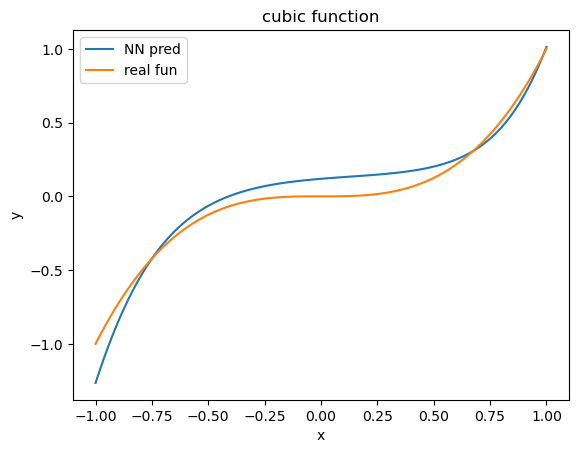

In [6]:
# validate results

n_test = 100
x_test = np.linspace(-1, 1, n_test).reshape(n_test,1)

y_test, activations = eval_network(x_test, weights)

y_act = x_test**3

plt.figure()
plt.plot(x_test, y_test)
plt.plot(x_test, y_act)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['NN pred', 'real fun'])
plt.title('cubic function')